# Carrington sunmap

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
import sunpy.sun
from sunpy.coordinates import frames

from module import readFitsBz2

c:\Users\lherrington\anaconda3\envs\climso\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hdu = readFitsBz2('carrington_test_data/imoa_06563_l1_20240306_08490557_emi1.fts.bz2')

coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=hdu.header['DATE_OBS'],
                observer='earth', frame=frames.Helioprojective)
    
header = sunpy.map.make_fitswcs_header(hdu.data, coord,
                                    reference_pixel=[hdu.header['CRPIX1'], hdu.header['CRPIX2']]*u.pixel,
                                    scale=[1.2, 1.2]*u.arcsec/u.pixel)

map = sunpy.map.Map(hdu.data, header)

In [3]:
coordinates = sunpy.map.all_coordinates_from_map(map)
weights = coordinates.transform_to("heliocentric").z.value

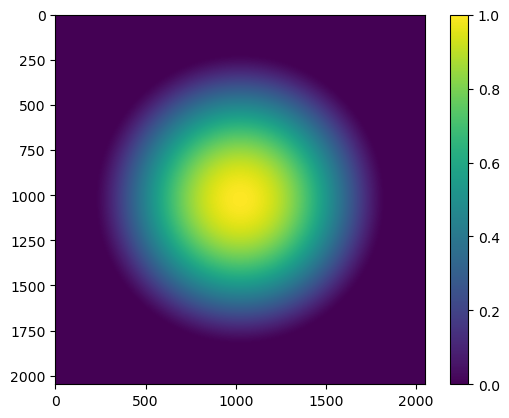

In [4]:
weights = (weights / np.nanmax(weights)) ** 3

weights[np.isnan(weights)] = 0

fig, ax = plt.subplots()
im = ax.imshow(weights)
fig.colorbar(im)

plt.show()

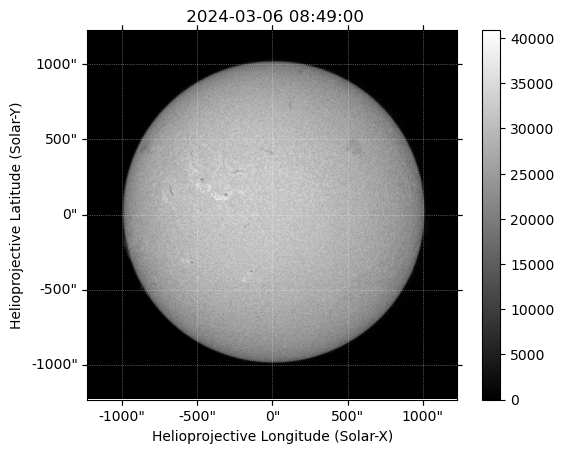

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection=map)
im = map.plot(axes=ax)
plt.colorbar(im, ax=ax);

## Carrington

In [6]:
import os
from module import carrington

folder = 'carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename, weights=weights))

In [20]:
img = np.full(carrington_list[0].data.shape, np.nan)
for carr in carrington_list:
    nan_img = np.isnan(img)
    nan_carr = np.isnan(carr.data)
    keep_img = ~nan_img & nan_carr
    keep_carr = nan_img & ~nan_carr
    out = img + carr.data
    out[keep_img] = img[keep_img]
    out[keep_carr] = carr.data[keep_carr]
    img=out

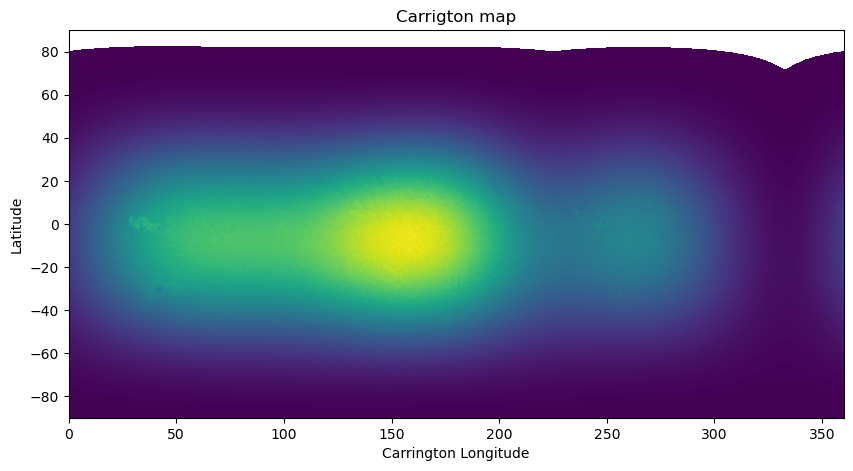

In [21]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, origin='lower', extent=[0,360,-90,90])
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrigton map');